In [107]:
import gym_bondgraph
import gymnasium as gym
from gymnasium.wrappers import FlattenObservation
from gymnasium import spaces
from bond_graph import *
import numpy as np

%reload_ext autoreload
%autoreload 2

Not connected
False


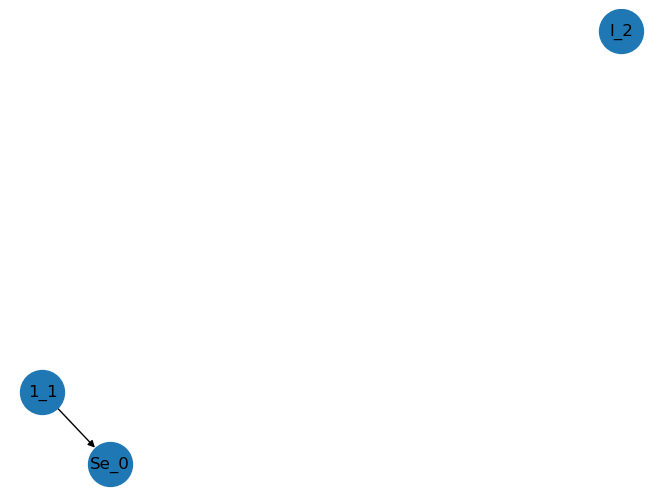

In [108]:
MAX_NODES = 8
MAX_STATES = 4

t_span = [0, 10]
time_array = np.linspace(t_span[0], t_span[1], 500)

s0 = BondGraph(max_nodes=MAX_NODES, max_states=MAX_STATES, time_array=time_array)
s0.add_element(EffortSource())
s0.add_element(OneJunction())
s0.add_bond(1, 0, -1)
s0.add_element(Inertance(1))
# s0.add_bond(2, 1, -1)

print(s0.is_valid_solution(verbose=True))
# print(s0.flow_causal_graph.in_degree(1))

labels = nx.get_node_attributes(s0.flow_causal_graph, 'element_label')
nx.draw(s0.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)


In [109]:
default_params = {
    'R': 1,
    'I': 1,
    'C': 1,
}
seed = np.random.randint(1,100)
# seed=420
env = gym.make('gym_bondgraph/BondGraphEnv-v4',  seed=None, seed_graph=s0, max_nodes=MAX_NODES, default_params=default_params)



## Manual Action Adding

In [113]:
env.reset()
action = env.action_space.sample()

action = {
    'node_or_bond': 0, # 0 for add node, 1 for add edge
    "node_type": BondGraphElementTypes.CAPACITANCE.value,
    "bond": [1, 0, 0], # 0 for negative bond sign, 1 for positive
    "node_param": 5
    }

observation, reward, terminated, na, info = env.step(action)


# env = FlattenObservation(env)
# print(env.observation_space.sample())
# print(spaces.utils.flatten(env.observation_space, env.observation_space.sample()))

# causal_adjacency_mask, power_flow_adjacency_mask = env.bond_graph.get_bond_addition_mask()

# print("Causal Adjacency Mask: \n", causal_adjacency_mask)
# print()
# print("Power Flow Adjacency Mask: \n", power_flow_adjacency_mask)
# print()

print("Action: ", action)
print("Observation: ", observation)
print("Reward: ", reward)
print("Terminated: ", terminated)
print("Info: ", info)

Action:  {'node_or_bond': 0, 'node_type': 5, 'bond': [1, 0, 0], 'node_param': 5}
Observation:  OrderedDict({'adjacency_matrix_space': array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]]), 'node_param_space': array([0, 0, 1, 5, 0, 0, 0, 0]), 'node_type_space': array([1, 4, 6, 5, 0, 0, 0, 0])})
Reward:  -1
Terminated:  False
Info:  {'num_nodes': 4, 'valid solution': False}


## Random action sampling

In [86]:

env.reset()
num_invalid_systems = 0
num_valid_systems = 0
valid_systems = []
for i in range(10000):
    action = env.action_space.sample()
    # print("Action: ", action)

    observation, reward, terminated, _, info = env.step(action)
    if env.bond_graph.is_valid_solution():
        num_valid_systems+=1
        print("Reward: ", reward)
        if(reward>0):
            valid_systems.append(env.bond_graph)
    else:
        num_invalid_systems+=1
    
    if terminated:
        env.reset()
    # print("Observation: ", observation)


    # print("Terminated: ", terminated)
    # print("Node Addition Mask: ", env.bond_graph.get_element_addition_mask())
    # print("---------------------------------")
print("Valid Systems: ", num_valid_systems)
print("Invalid Systems: ", num_invalid_systems)
    


/home/workstation4/anaconda3/envs/bondgraph/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.bond_graph to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.bond_graph` for environment variables or `env.get_wrapper_attr('bond_graph')` that will search the reminding wrappers.
  logger.warn(


Singular value matrix detected. Cannot solve.
Reward:  -99900
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Reward:  -10
Singular value matrix detected. Cannot solve.
Reward:  -99900
Reward:  -10
Singular value matrix detected. Cannot solve.
Reward:  -99900
Reward: 

4


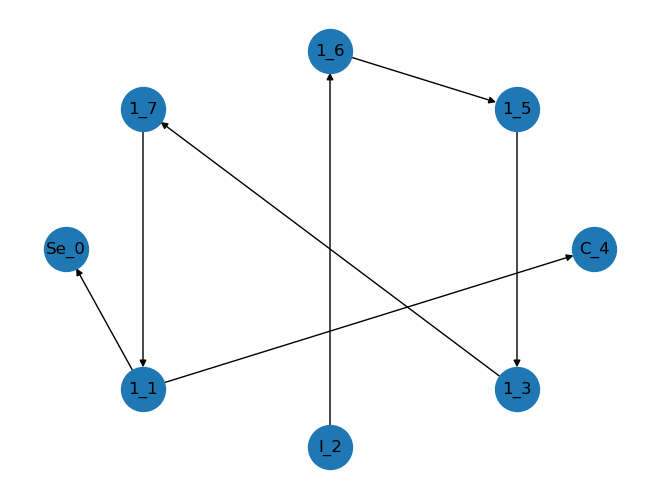

In [87]:
print(len(valid_systems))

i = 0
labels = nx.get_node_attributes(valid_systems[i].flow_causal_graph, 'element_label')
nx.draw_shell(valid_systems[i].flow_causal_graph, labels=labels, with_labels=True, node_size=1000)



IndexError: index 2 is out of bounds for axis 1 with size 2

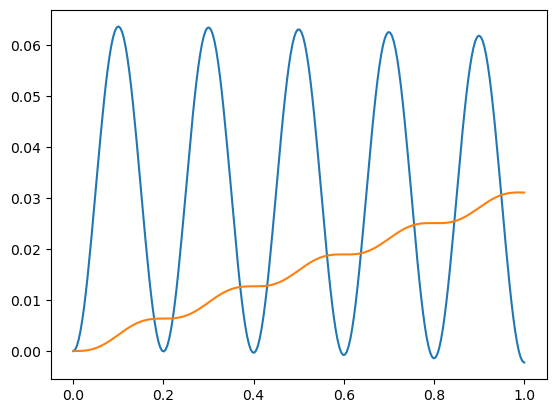

In [88]:
from scipy import *
import time
import matplotlib.pyplot as plt
t_span = [0, 1]
t = np.linspace(t_span[0], t_span[1], 250)

x0 = x0 = np.zeros(len(valid_systems[i].get_energy_storage_elements())) # Initial conditions

# Generate a forcing input at 5 hertz
omega = 2*np.pi*5 
u = lambda t: [np.sin(omega*t)]

y = integrate.odeint(valid_systems[i].dynamics, x0, t, args=(u,))

(ts, num_states) = shape(y)
plt.plot(t, y[:, 0], label='x0(t)')
plt.plot(t, y[:, 1], label='x1(t)')
plt.plot(t, y[:, 2], label='x2(t)')
plt.xlabel('Time')
plt.grid()
plt.legend()
plt.show()

Causal Adjacency Mask: 
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]

Power Flow Adjacency Mask: 
 [[0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1]
 [0 0 0 0 0 0 0 0]]

False


AssertionError: 

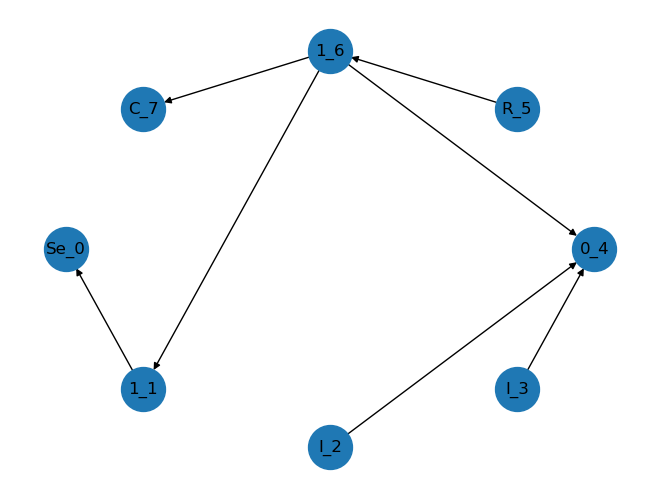

In [ ]:
labels = nx.get_node_attributes(env.bond_graph.flow_causal_graph, 'element_label')
nx.draw_shell(env.bond_graph.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)

causal_adjacency_mask, power_flow_adjacency_mask = env.bond_graph.get_bond_addition_mask()

print("Causal Adjacency Mask: \n", causal_adjacency_mask)
print()
print("Power Flow Adjacency Mask: \n", power_flow_adjacency_mask)
print()



# print(type(list(env.bond_graph.flow_causal_graph.edges)[0]))

print(env.bond_graph.is_valid_solution())
env.bond_graph.update_state_space_matrix(verbose=True)


